Project 1

#Dictionary Information
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]


#Angina is chest pain caused by reduced blood flow to the heart muscles#

In [ ]:
Problem Statement: Relationship between age and cholesterol level in heart disease patients

In [ ]:
https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
!pwd

/Users/hweeli/Documents/Project 1


In [3]:
#define names and read csv file
names = ["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope", "HeartDiease"]
heart_csv = '../Project 1/heart.csv'
data = pd.read_csv(heart_csv)

In [4]:
#head
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [5]:
#tail
data.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [5]:
#shape (rows,columns)
data.shape

(918, 12)

In [6]:
#data type
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
#check for any null value
data.isna().sum()
#no null value within the data set

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
#statiscal summary of the data
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [9]:
#finding the unique value of heart disease
data["HeartDisease"].unique()

array([0, 1])

In [10]:
data = data.reset_index()

In [11]:
data.head()

index  Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0      0   40   M           ATA        140          289          0     Normal   
1      1   49   F           NAP        160          180          0     Normal   
2      2   37   M           ATA        130          283          0         ST   
3      3   48   F           ASY        138          214          0     Normal   
4      4   54   M           NAP        150          195          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0

In [12]:
#selecting first row of df
data.loc[0]

index                  0
Age                   40
Sex                    M
ChestPainType        ATA
RestingBP            140
Cholesterol          289
FastingBS              0
RestingECG        Normal
MaxHR                172
ExerciseAngina         N
Oldpeak              0.0
ST_Slope              Up
HeartDisease           0
Name: 0, dtype: object

<AxesSubplot:>

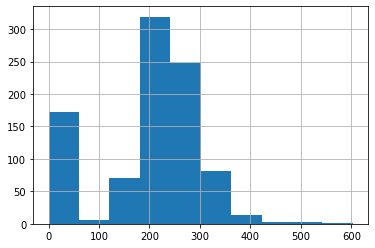

In [13]:
data["Cholesterol"].hist(bins=10)

<AxesSubplot:>

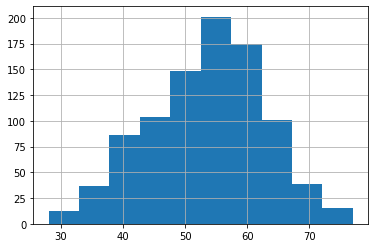

In [14]:
data["Age"].hist(bins=10)

<AxesSubplot:>

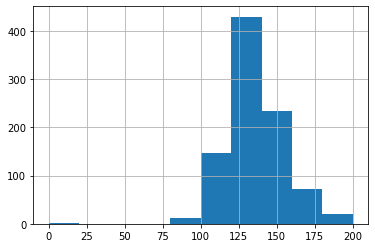

In [15]:
data["RestingBP"].hist(bins=10)

<AxesSubplot:>

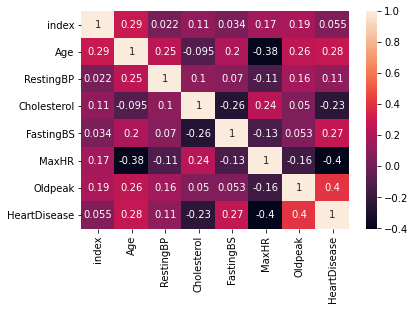

In [17]:
sns.heatmap(data.corr(), annot=True)

In [16]:
rows = ['index', 'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Cols = ['index', 'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
df = data(abs(np.random.randn(5, 4)), index=rows, columns=Cols)

sns.heatmap(df, annot=True)

TypeError: 'DataFrame' object is not callable

In [16]:
data.corr()

index       Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
index         1.000000  0.289604   0.022075     0.111230   0.033716  0.165221   
Age           0.289604  1.000000   0.254399    -0.095282   0.198039 -0.382045   
RestingBP     0.022075  0.254399   1.000000     0.100893   0.070193 -0.112135   
Cholesterol   0.111230 -0.095282   0.100893     1.000000  -0.260974  0.235792   
FastingBS     0.033716  0.198039   0.070193    -0.260974   1.000000 -0.131438   
MaxHR         0.165221 -0.382045  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak       0.188523  0.258612   0.164803     0.050148   0.052698 -0.160691   
HeartDisease  0.055109  0.282039   0.107589    -0.232741   0.267291 -0.400421   

               Oldpeak  HeartDisease  
index         0.188523      0.055109  
Age           0.258612      0.282039  
RestingBP     0.164803      0.107589  
Cholesterol   0.050148     -0.232741  
FastingBS     0.052698      0.267291  
MaxHR        -0.160691     -0.400421  
Oldpeak       1.000000      0.403951  
HeartDisease  0.403951      1.000000

<AxesSubplot:>

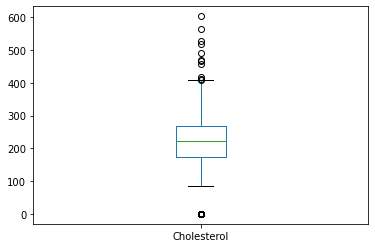

In [18]:
data['Cholesterol'].plot.box()

In [17]:
#finding relationship between features and heartdisease
def bar_charts(data, feature):
    
    _agg = {
        'index': 'count'
    }
    _groupby = ['HeartDisease', feature]
    
    df_feature = data.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('HeartDisease')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

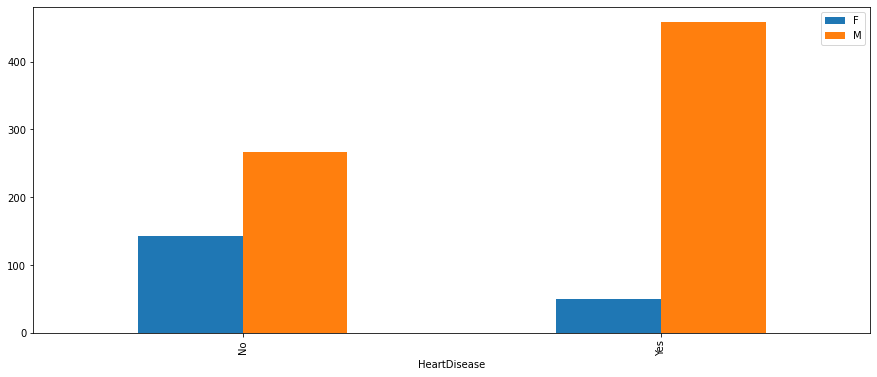

In [18]:
#showing the r/s between heart diease and Sex
bar_charts(data, "Sex")
#Male are in higher chances of getting heart disease

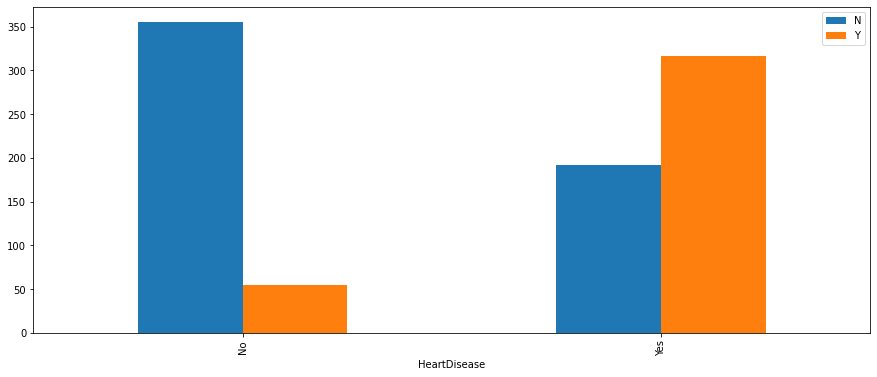

In [21]:
bar_charts(data, "ExerciseAngina")
#higher chances of heart disease 
#incurred in people who most likely have angina during exercise

In [19]:
data["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

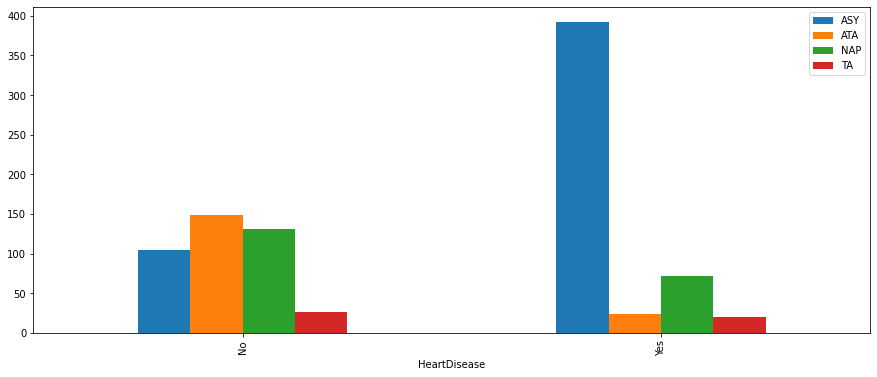

In [20]:
bar_charts(data, "ChestPainType")#Heart Disease are mostly Asy chest pain type


In [24]:
#correlation
data.corr()

index       Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
index         1.000000  0.289604   0.022075     0.111230   0.033716  0.165221   
Age           0.289604  1.000000   0.254399    -0.095282   0.198039 -0.382045   
RestingBP     0.022075  0.254399   1.000000     0.100893   0.070193 -0.112135   
Cholesterol   0.111230 -0.095282   0.100893     1.000000  -0.260974  0.235792   
FastingBS     0.033716  0.198039   0.070193    -0.260974   1.000000 -0.131438   
MaxHR         0.165221 -0.382045  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak       0.188523  0.258612   0.164803     0.050148   0.052698 -0.160691   
HeartDisease  0.055109  0.282039   0.107589    -0.232741   0.267291 -0.400421   

               Oldpeak  HeartDisease  
index         0.188523      0.055109  
Age           0.258612      0.282039  
RestingBP     0.164803      0.107589  
Cholesterol   0.050148     -0.232741  
FastingBS     0.052698      0.267291  
MaxHR        -0.160691     -0.400421  
Oldpeak       1.000000      0.403951  
HeartDisease  0.403951      1.000000

In [21]:
data['Age'].min()

28

In [22]:
data['Age'].max()

77

In [23]:
def create_age_class(x):
    if x > 60:
        age_class = 6
    elif x > 55 and x <=60:
        age_class = 5
    elif x > 45 and x <=55:
        age_class = 4
    elif x > 35 and x <= 45:
        age_class = 3
    elif x > 30 and x <= 35:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [24]:
data['Age Class'] = data['Age'].apply(create_age_class)

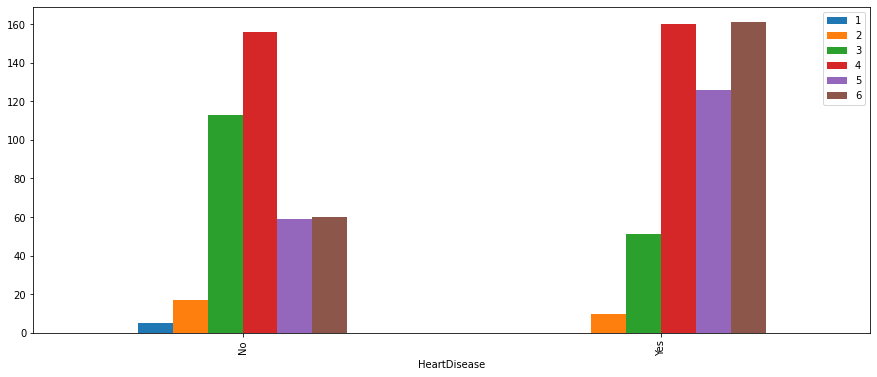

In [25]:
bar_charts(data, data['Age Class'])
#about 50% of age between 46 and 55 will have heart disease


In [26]:
data['Cholesterol'].max()

603

In [27]:
data['Cholesterol'].min()

0

In [28]:
def create_cholesterol(c):
    if c > 400:
        cholesterol_amt = 4
        
    elif c > 239 and c <= 400:
        cholesterol_amt = 3
        
    elif c > 100 and c <= 239:
        cholesterol_amt =2
        
    else:
        cholesterol_amt = 1
        
    return cholesterol_amt

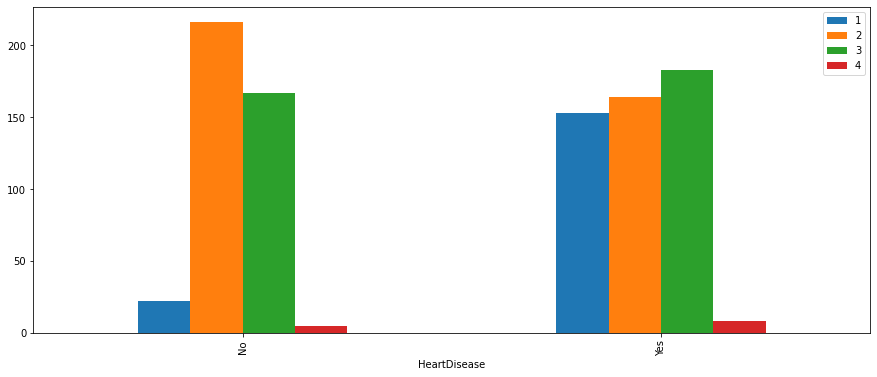

In [29]:
data['cholesterol_amt'] = data['Cholesterol'].apply(create_cholesterol)
bar_charts(data, data['cholesterol_amt'])

In [30]:
!pip install pandas_profiling

In [56]:
import pandas_profiling 
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
data.describe().T

count        mean         std   min     25%    50%     75%  \
index            918.0  458.500000  265.148072   0.0  229.25  458.5  687.75   
Age              918.0   53.510893    9.432617  28.0   47.00   54.0   60.00   
RestingBP        918.0  132.396514   18.514154   0.0  120.00  130.0  140.00   
Cholesterol      918.0  198.799564  109.384145   0.0  173.25  223.0  267.00   
FastingBS        918.0    0.233115    0.423046   0.0    0.00    0.0    0.00   
MaxHR            918.0  136.809368   25.460334  60.0  120.00  138.0  156.00   
Oldpeak          918.0    0.887364    1.066570  -2.6    0.00    0.6    1.50   
HeartDisease     918.0    0.553377    0.497414   0.0    0.00    1.0    1.00   
Age Class        918.0    4.429194    1.151973   1.0    4.00    4.0    5.00   
cholesterol_amt  918.0    2.218954    0.762386   1.0    2.00    2.0    3.00   

                   max  
index            917.0  
Age               77.0  
RestingBP        200.0  
Cholesterol      603.0  
FastingBS          1.0  
MaxHR            202.0  
Oldpeak            6.2  
HeartDisease       1.0  
Age Class          6.0  
cholesterol_amt    4.0

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

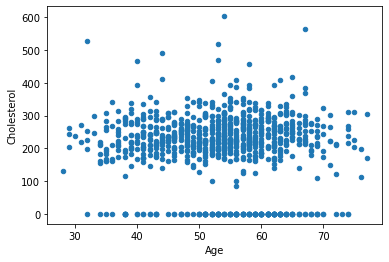

In [33]:
data.plot.scatter('Age', 'Cholesterol')

In [35]:
import seaborn as sns

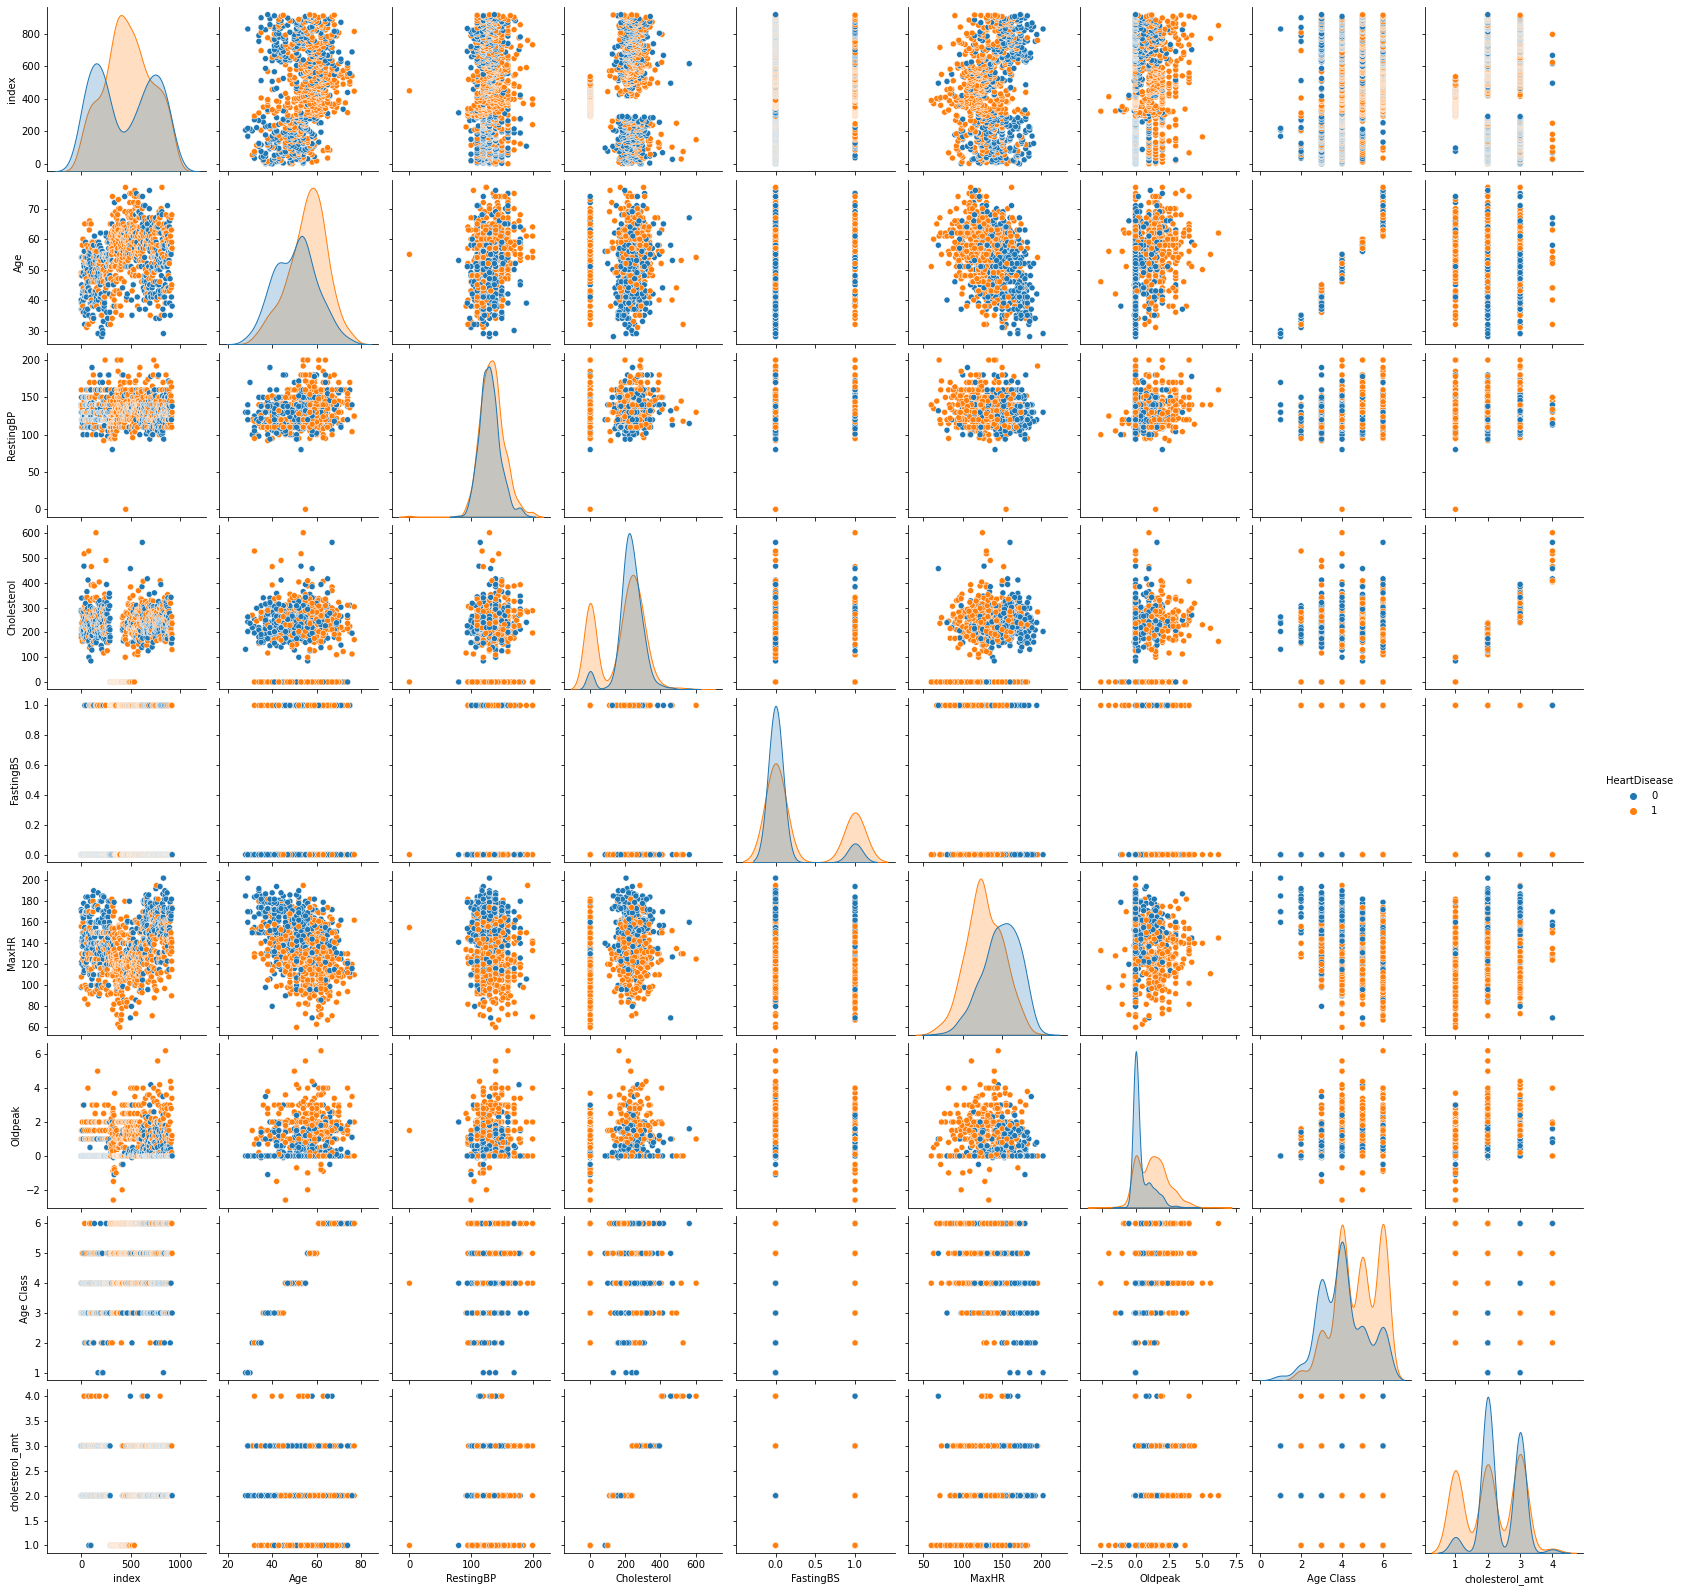

In [36]:
sns.pairplot(data=data, hue='HeartDisease')
#showing relationship of entire df

In [40]:
data[(data.Age > 45)&(data['HeartDisease'] == 1)]

index  Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  \
1        1   49   F           NAP        160          180          0   
3        3   48   F           ASY        138          214          0   
11      11   58   M           ATA        136          164          0   
13      13   49   M           ASY        140          234          0   
18      18   60   M           ASY        100          248          0   
..     ...  ...  ..           ...        ...          ...        ...   
911    911   59   M           ASY        164          176          1   
912    912   57   F           ASY        140          241          0   
914    914   68   M           ASY        144          193          1   
915    915   57   M           ASY        130          131          0   
916    916   57   F           ATA        130          236          0   

    RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  \
1       Normal    156              N      1.0     Flat             1   
3       Normal    108              Y      1.5     Flat             1   
11          ST     99              Y      2.0     Flat             1   
13      Normal    140              Y      1.0     Flat             1   
18      Normal    125              N      1.0     Flat             1   
..         ...    ...            ...      ...      ...           ...   
911        LVH     90              N      1.0     Flat             1   
912     Normal    123              Y      0.2     Flat             1   
914     Normal    141              N      3.4     Flat             1   
915     Normal    115              Y      1.2     Flat             1   
916        LVH    174              N      0.0     Flat             1   

     Age Class  cholesterol_amt  
1            4                2  
3            4                2  
11           5                2  
13           4                2  
18           5                3  
..         ...              ...  
911          5                2  
912          5                3  
914          6                2  
915          5                2  
916          5                2  

[447 rows x 15 columns]

In [50]:
data[(data.Age <= 45)&(data['HeartDisease'] == 1)]

index  Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  \
8        8   37   M           ASY        140          207          0   
16      16   38   M           ASY        110          196          0   
19      19   36   M           ATA        120          267          0   
23      23   44   M           ATA        150          288          0   
33      33   41   M           ASY        130          172          0   
..     ...  ...  ..           ...        ...          ...        ...   
852    852   43   M           ASY        120          177          0   
867    867   44   M           ASY        112          290          0   
887    887   43   M           ASY        132          247          1   
907    907   44   M           ASY        120          169          0   
913    913   45   M            TA        110          264          0   

    RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  \
8       Normal    130              Y      1.5     Flat             1   
16      Normal    166              N      0.0     Flat             1   
19      Normal    160              N      3.0     Flat             1   
23      Normal    150              Y      3.0     Flat             1   
33          ST    130              N      2.0     Flat             1   
..         ...    ...            ...      ...      ...           ...   
852        LVH    120              Y      2.5     Flat             1   
867        LVH    153              N      0.0       Up             1   
887        LVH    143              Y      0.1     Flat             1   
907     Normal    144              Y      2.8     Down             1   
913     Normal    132              N      1.2     Flat             1   

     Age Class  cholesterol_amt  
8            3                2  
16           3                2  
19           3                3  
23           3                3  
33           3                2  
..         ...              ...  
852          3                2  
867          3                3  
887          3                3  
907          3                2  
913          3                3  

[61 rows x 15 columns]

In [63]:
# # Null Hypothesis Dictionary
null_hypothesis = {
    'H0': 'Older age groups will have similar level of cholesterol as young age groups. (LH - SH = 0)',
    'H1': 'Older age groups will have higher level cholesterol than young age. (LH - SH > 0)'
}

In [64]:
alpha = 0.05

In [65]:
#sample size
N = 100
age = 45

old_age = data[(data.Age > age)&(data['HeartDisease'] == 1)]['Cholesterol'].sample(N, random_state=42)
young_age = data[(data.Age <= age)&(data['HeartDisease'] == 1)]['Cholesterol'].sample(N, random_state=42, replace=True)

In [66]:
print(old_age)

563    204
744    230
344      0
771    217
254    248
      ... 
298      0
588    219
685    260
419    228
557    208
Name: Cholesterol, Length: 100, dtype: int64


In [67]:
print(young_age)

386      0
775    231
313      0
119    156
457      0
      ... 
349      0
88     291
358      0
116    282
325      0
Name: Cholesterol, Length: 100, dtype: int64


In [54]:
#variance
var_a= old_age.var()
var_b= young_age.var()

In [68]:
print (var_a)
print (var_b)

11870.822121212128
19573.46212121212


In [69]:
## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)
print(s)

125.38796641309773


In [70]:
## Calculate the t-statistics
t = (old_age.mean() - young_age.mean())/(s*np.sqrt(2/N))
print(t)

0.08120665754750327


In [71]:
# Calculate the degree of freedom
df = 2*N - 2

print(df)

198


In [73]:
p = 1 - stats.t.cdf(t, df = df)
print(p)

0.4676798155573093


In [74]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [75]:
def check_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        str_result = 'We reject the null hypothesis in favour of the alternative.'
        str_result += '\n%s' % null_hypothesis['H1']
    elif p_value > alpha:
        str_result = 'We fail to reject the null hypothesis.'
        str_result += '\n%s' % null_hypothesis['H0']
    else:
        str_result = 'Our test is inconclusive.'
    return str_result

In [76]:
p_value = 2 * stats.t.cdf(abs(t), df=df)

print('t  = %f' % t)
print('p = %f' % p_value)
print(check_sig(p, alpha))

t  = 0.081207
p = 1.064640
We fail to reject the null hypothesis.
Older age groups will have similar level of cholesterol as young age groups. (LH - SH = 0)


In [43]:
df = data.groupby('HeartDisease').agg('min', 'max')
df

index  Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
HeartDisease                                                                  
0                 0   28         80            0          0     69     -1.1   
1                 1   31          0            0          0     60     -2.6   

              Age Class  cholesterol_amt  
HeartDisease                              
0                     1                1  
1                     2                1

In [44]:
df = data.groupby('Cholesterol').agg('min', 'max')
df

index  Age  RestingBP  FastingBS  MaxHR  Oldpeak  HeartDisease  \
Cholesterol                                                                   
0              293   32          0          0     60     -2.6             0   
85              98   56        120          0    140      0.0             0   
100             78   52        120          0    120      0.0             0   
110            571   69        140          1    109      1.5             1   
113            541   76        104          0    120      3.5             1   
...            ...  ...        ...        ...    ...      ...           ...   
491            250   44        135          0    135      0.0             1   
518             30   53        145          0    130      0.0             1   
529             76   32        118          0    130      0.0             1   
564            616   67        115          0    160      1.6             0   
603            149   54        130          1    125      1.0             1   

             Age Class  cholesterol_amt  
Cholesterol                              
0                    2                1  
85                   5                1  
100                  4                1  
110                  6                2  
113                  6                2  
...                ...              ...  
491                  3                4  
518                  4                4  
529                  2                4  
564                  6                4  
603                  4                4  

[222 rows x 9 columns]

In [45]:
#Groupby function in Age
df = data.groupby('Age').agg('min', 'max')
df

index  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
Age                                                                           
28     208        130          132          0    185      0.0             0   
29     170        120          204          0    160      0.0             0   
30     215        170          237          0    170      0.0             0   
31      56        100          219          0    150      0.0             0   
32      35         95            0          0    127      0.0             0   
33     115        100          246          0    150      0.0             0   
34     107         98            0          0    150      0.0             0   
35      42        110            0          0    130     -0.1             0   
36      19        110            0          0    125      0.0             0   
37       2        118          173          0     98      0.0             0   
38      16         92            0          0    105     -1.1             0   
39       5         94          147          0    106      0.0             0   
40       0         95            0          0     80      0.0             0   
41      33        104            0          0    111      0.0             0   
42      14        102            0          0     99     -1.5             0   
43      17        100            0          0    118      0.0             0   
44      21        108          141          0    100      0.0             0   
45       6        104            0          0    110     -0.1             0   
46      63        100            0          0     90     -2.6             0   
47      51        108            0          0     98      0.0             0   
48       3        100            0          0     92      0.0             0   
49       1        100            0          0     96      0.0             0   
50      47        110            0          0    110      0.0             0   
51      29         94            0          0     60     -0.7             0   
52      27         95            0          0     82      0.0             0   
53      26         80            0          0     95      0.0             0   
54       4        108            0          0     91      0.0             0   
55      74          0            0          0     73      0.0             0   
56      31        115            0          0     82     -2.0             0   
57      70         95            0          0     88      0.0             0   
58      11        100            0          0     69      0.0             0   
59      45        110            0          0     90      0.0             0   
60      18        100            0          0     63      0.0             0   
61     134        105            0          0     70      0.0             0   
62     195        110            0          0     72     -0.8             0   
63      82         96            0          0     84     -0.9             0   
64     339         95            0          0     96      0.0             0   
65      36        110            0          0     67      0.0             0   
66      85        110            0          0     90     -0.5             0   
67     355        100            0          0     71      0.0             0   
68     319        118            0          0    115      0.0             0   
69     345        122            0          0     84      0.0             0   
70     378        115            0          0     92      0.0             0   
71     552        110          149          0    108      0.0             0   
72     336        120            0          0    102      1.0             0   
73     375        160            0          0    121      0.0             1   
74     315        120            0          0     94      0.0             0   
75     491        136          203          0    108      0.0             0   
76     541        104          113          0    116   